In [1]:
#Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

Load data

In [2]:
data = pd.read_csv(r"default_of_credit_card_clients.csv", skiprows = 1)

In [ ]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Slice and Dice

In [4]:
print("There are " + str(len(data["ID"].unique())) + " customers in the sample")

There are 30000 customers in the sample


In [5]:
print(str(len(data[data["SEX"] == 1])) + " respondents are males")
print(str(len(data[data["SEX"] == 2])) + " respondents are females")
#Therefore, the most common sex is 2

11888 respondents are males
18112 respondents are females


In [6]:
pivot_1 = pd.pivot_table(data, columns='default payment next month', index='SEX', values='ID', aggfunc='count')
pivot_1["Percentage of defaults"] = pivot_1[1] / (pivot_1[1] + pivot_1[0])
pivot_1

default payment next month,0,1,Percentage of defaults
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


The number of defaults is higher for females (3673) compare to males (2873)

The percentage of defaults is higher for males (24.17%) compare to females (20.78%)

In [7]:
#Q1.4
data["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

There are 4 categories for variable MARRIAGE

15,964 respondents are single

13,659 respondents are married

Other respondents do not indicate their marital status 

# Histograms and Boxplots

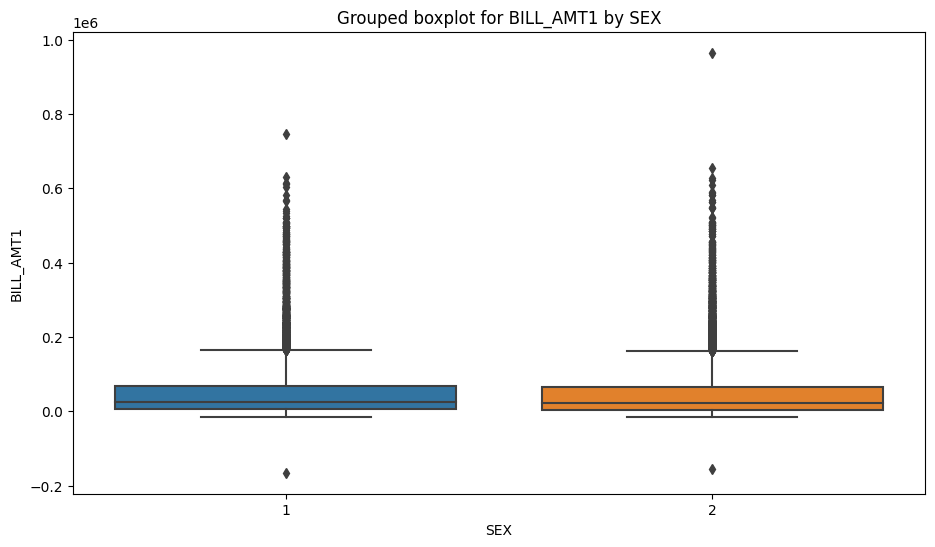

In [8]:
plt.figure(figsize=(11,6))
sns.boxplot(x='SEX', y='BILL_AMT1', data=data)
plt.title("Grouped boxplot for BILL_AMT1 by SEX")
plt.show()
#The distribution of BILL_AMT1 is approximately the same for both genders

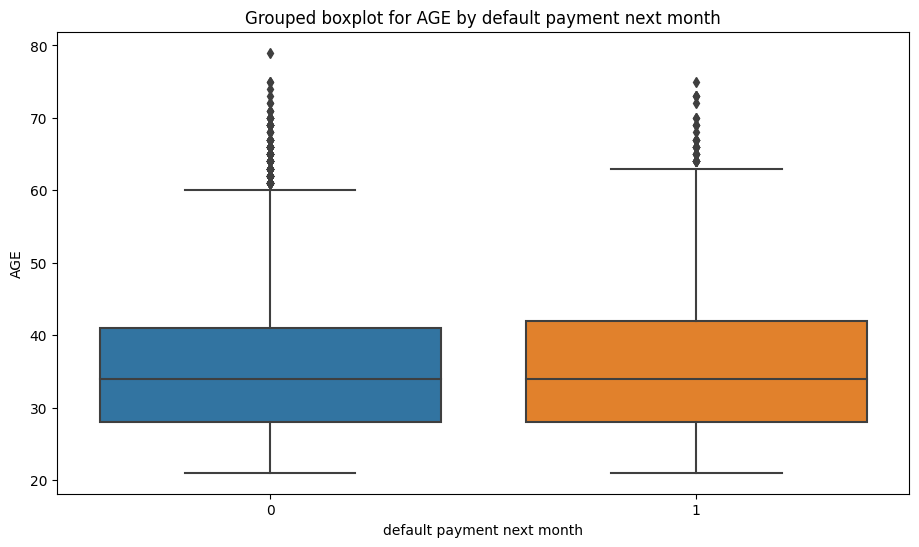

In [9]:
plt.figure(figsize=(11,6))
sns.boxplot(x='default payment next month', y='AGE', data=data)
plt.title("Grouped boxplot for AGE by default payment next month")
plt.show()

There is no relationship between AGE and default payment next month

# kNN Model

- Model 'default' using kNN. 
- Randomly partition the data into a training set (70%) and a validation set (30%). 
- Determine optimal k using the validation set.

In [10]:
data = pd.get_dummies(data, columns=['MARRIAGE'], drop_first=True)
data = data.drop(columns=['ID'])

Xs = data.drop(columns=['default payment next month'])
Y = data["default payment next month"]

X_train, X_validation, y_train, y_validation = train_test_split(Xs, Y, test_size=0.30, random_state=4)

data

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,24,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,True,False,False
1,120000,2,2,26,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,False,True,False
2,90000,2,2,34,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,False,True,False
3,50000,2,2,37,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,True,False,False
4,50000,1,2,57,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,39,0,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,True,False,False
29996,150000,1,3,43,-1,-1,-1,-1,0,0,...,1837,3526,8998,129,0,0,0,False,True,False
29997,30000,1,2,37,4,3,2,-1,0,0,...,0,0,22000,4200,2000,3100,1,False,True,False
29998,80000,1,3,41,1,-1,0,0,0,-1,...,85900,3409,1178,1926,52964,1804,1,True,False,False


<Axes: xlabel='k', ylabel='accuracy'>

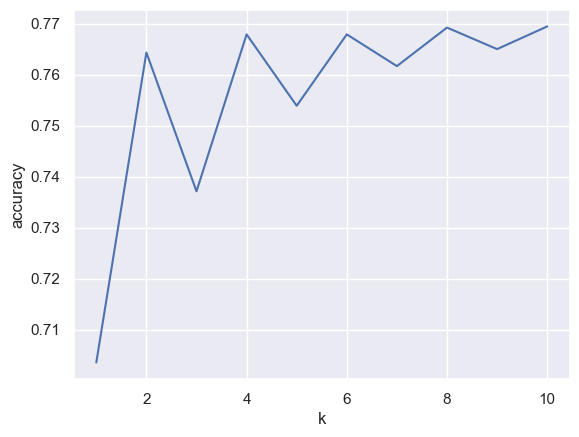

In [11]:

accuracy_lst = []

for i in range(1, 10 + 1):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    prediction = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, prediction)
    #print("For k = " + str(i) + " accuracy rate is " + str(accuracy))
    accuracy_lst.append( accuracy )


# plot accuracy for each value of k
k_range = [*range(1,10+1)]
d = {'k': k_range, 'accuracy': accuracy_lst}
knn_accuracy = pd.DataFrame(d)

sns.set(style='darkgrid')
sns.lineplot(x='k', y='accuracy', data=knn_accuracy)

In [12]:
#Accuracy does not grow significantly after k = 4
#Therefore, we use this number for k:
model = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

## Evaluate the model

In [13]:
prediction = model.predict(X_validation)
result = pd.DataFrame({'pred': prediction, 'real': y_validation})
result['fict'] = 1
conf_matrix = pd.pivot_table(result, columns='pred', index='real', values='fict', aggfunc='sum')
print(conf_matrix)
print("ROC value is " + str(roc_auc_score(y_validation, prediction)))

pred     0    1
real           
0     6683  286
1     1803  228
ROC value is 0.5356105419802786


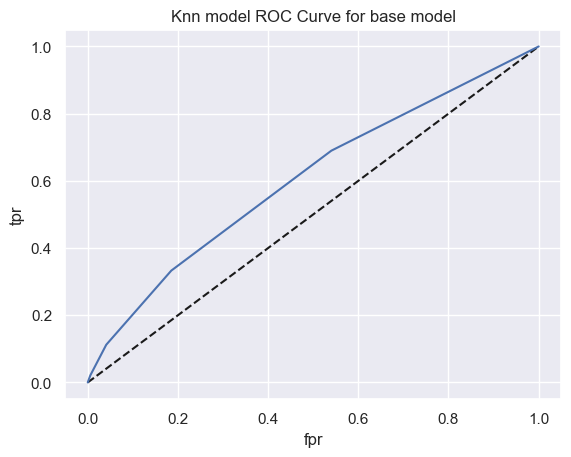

In [14]:
# model = KNeighborsClassifier(n_neighbors=selected_knn_k ).fit(X_train, y_train)

# prediction = model.predict(X_validation)
y_pred_proba = model.predict_proba(X_validation)[:,1]

fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn model ROC Curve for base model')
plt.show()

In [15]:
def classification_metrics_df(conf_matrix):
    accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / (conf_matrix[0][0] + conf_matrix[0][1]  + conf_matrix[1][0] + conf_matrix[1][1])
    misclassification_rate = (conf_matrix[0][1] + conf_matrix[1][0]) / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])
    true_positive_rate = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    false_positive_rate = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[0][0])
    specificity = conf_matrix[0][0] / (conf_matrix[1][0] + conf_matrix[0][0])
    precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
    prevalence = (conf_matrix[0][1] + conf_matrix[1][1])  / (conf_matrix[0][0] + conf_matrix[0][1] + conf_matrix[1][0] + conf_matrix[1][1])

    metrics = [accuracy, misclassification_rate,true_positive_rate, false_positive_rate, specificity, precision, prevalence]

    # store these performance metrics in a table so we can reference them later
    knn_model_metrics = pd.DataFrame(data = [metrics], columns =['accuracy', 'misclassification_rate','true_positive_rate', 'false_positive_rate', 'specificity', 'precision', 'prevalence'] ).round(2)
    return knn_model_metrics

knn_model_metrics = classification_metrics_df(conf_matrix)
knn_model_metrics

,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence
0,0.77,0.23,0.11,0.04,0.96,0.44,0.23


Segment customers on age, using K means clustering:

In [16]:
# # k means uses cartesian coordinates. 
# # Payment default is either 0/1
# # Age has a much larger range

# # Let's try scaling age to be between 0 and 1
# data_age_default = data[['AGE','default payment next month']].values

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(data_age_default)
# data_age_default = scaler.transform(data_age_default)

<Axes: xlabel='k', ylabel='Error'>

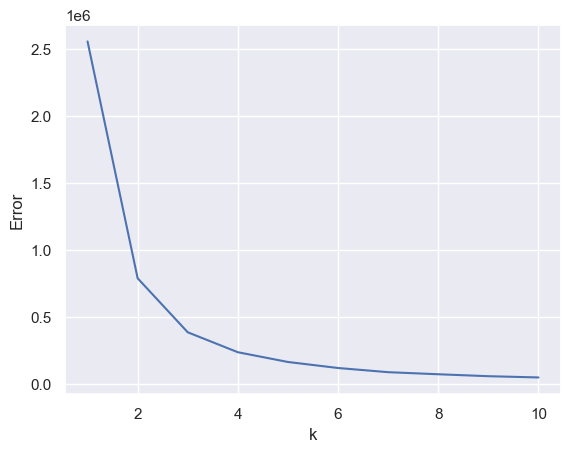

In [17]:
from sklearn.cluster import KMeans

data_age_default = data[['AGE','default payment next month']].values

km_errors = []
km_labels = []

for i in range(1, 10 + 1):
    k=i
    km = KMeans(n_clusters=k, random_state=0).fit(data_age_default)
    km_labels.append( km.labels_ )
    km_errors.append( km.inertia_ )


k_range = [*range(1,10+1)]

d = {'k': k_range, 'Error': km_errors}
knn_accuracy = pd.DataFrame(d)

sns.set(style='darkgrid')
sns.lineplot(x='k', y='Error', data=knn_accuracy)

In [18]:
# Looking at the elbow plot, the last significant decrease in error occurs at k=3
# The labels created from using k=3 will be added as a column in our dataset
selected_k = 3

# add the segment labels as a column to the data
data['Segment'] = pd.Series( km_labels[selected_k-1], name='Segment' )

<Axes: xlabel='AGE', ylabel='default payment next month'>

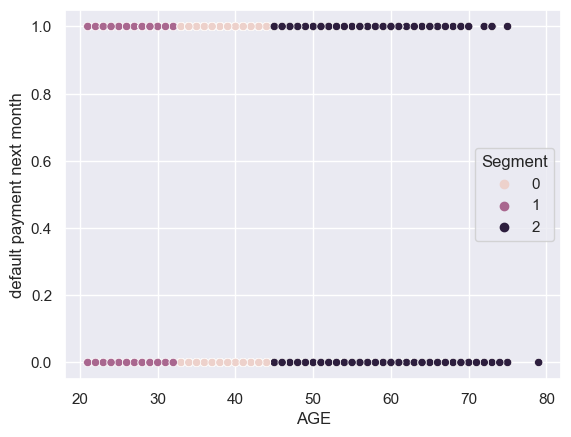

In [19]:
sns.scatterplot(data=data, x='AGE', y='default payment next month', hue='Segment')

- Model 'default' using kNN Classifier for each segment. 
    - Choose optimal value of k

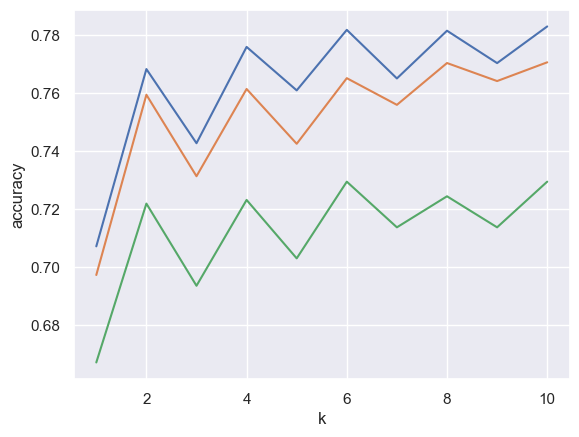

In [20]:

for segment_num in range(0,selected_k):

    # subset data for current segment_num
    data_temp = data.loc[data['Segment']==segment_num]

    Xs = data_temp.drop(columns=['default payment next month'])
    Y = data_temp["default payment next month"]

    X_train, X_validation, y_train, y_validation = train_test_split(Xs, Y, test_size=0.30, random_state=4)

    accuracy_lst = []
    
    for i in range(1, 10 + 1):
        model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        
        prediction = model.predict(X_validation)
        accuracy = accuracy_score(y_validation, prediction)
        accuracy_lst.append( accuracy )


    # plot accuracy for each value of k
    k_range = [*range(1,10+1)]
    d = {'k': k_range, 'accuracy': accuracy_lst}
    knn_accuracy = pd.DataFrame(d)

    sns.set(style='darkgrid')
    sns.lineplot(x='k', y='accuracy', data=knn_accuracy)


In [21]:
# Lowest K with high accuracy occurs at k=4
selected_knn_k = 4

- Compare KNN model accuracy metrics for by segment:

In [22]:
conf_matrix_lst = []
#for simplicity, retrain and predict models with k=4
#store the confusion matrices that are produced
for segment_num in range(0,selected_k):
    data_temp = data.loc[data['Segment']==segment_num]
    Xs = data_temp.drop(columns=['default payment next month'])
    Y = data_temp["default payment next month"]
    X_train, X_validation, y_train, y_validation = train_test_split(Xs, Y, test_size=0.30, random_state=4)

    model = KNeighborsClassifier(n_neighbors=selected_knn_k ).fit(X_train, y_train)

    prediction = model.predict(X_validation)
    result = pd.DataFrame({'pred': prediction, 'real': y_validation})
    result['fict'] = 1
    conf_matrix = pd.pivot_table(result, columns='pred', index='real', values='fict', aggfunc='sum')
    conf_matrix_lst.append(conf_matrix)

    print("Segment "+str(segment_num))
    print(conf_matrix)
    print("ROC value is " + str(roc_auc_score(y_validation, prediction)))
    print("\n")


Segment 0
pred     0    1
real           
0     2557  120
1      641   80
ROC value is 0.5330653530330026


Segment 1
pred     0    1
real           
0     2980  133
1      825   79
ROC value is 0.5223326600695343


Segment 2
pred     0   1
real          
0     1111  66
1      373  36
ROC value is 0.5159723967735301




In [23]:
# The ROC Scores appear similar between each segment's model, and the confusion matrices are similarly balanced.
# In comparison to the previous model (without segmentation), the true positive rate is higher

In [24]:
# iterate through the confusion matrices for each segment, calculate metrics, store them in a dataframe for easy comparison

temp_df_lst = []

for conf_matrix in conf_matrix_lst:
    
    temp_df_lst += [classification_metrics_df(conf_matrix)]

model_metrics = pd.concat(temp_df_lst, axis=0).reset_index()
model_metrics

,index,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence
0,0,0.78,0.22,0.11,0.04,0.96,0.40,0.21
1,0,0.76,0.24,0.09,0.04,0.96,0.37,0.23
2,0,0.72,0.28,0.09,0.06,0.94,0.35,0.26


In [25]:
model_metrics

,index,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence
0,0,0.78,0.22,0.11,0.04,0.96,0.40,0.21
1,0,0.76,0.24,0.09,0.04,0.96,0.37,0.23
2,0,0.72,0.28,0.09,0.06,0.94,0.35,0.26


In [26]:
# The models perform similarly for each segment, which is good.

- ROC curve for each AGE segment and AUCs: 


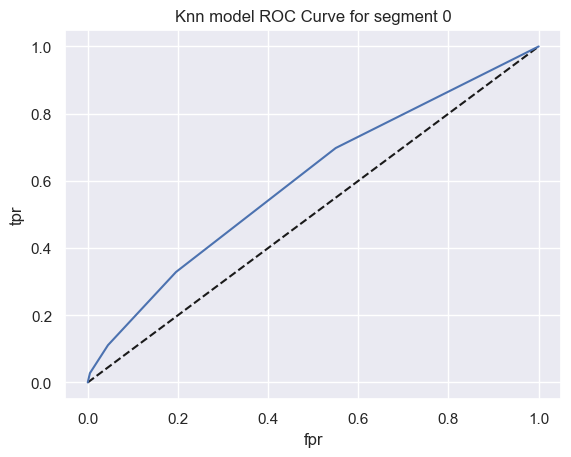

ROC value is 0.5330653530330026




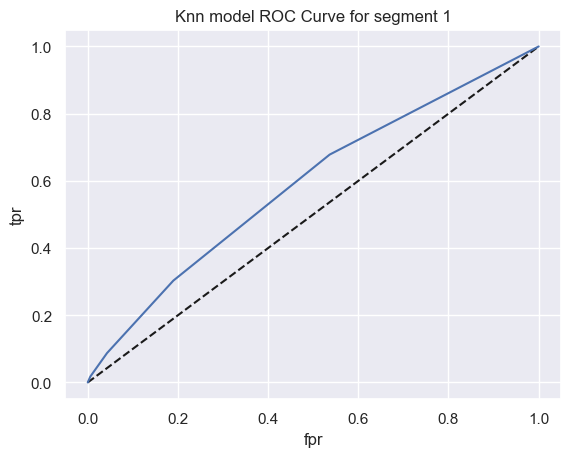

ROC value is 0.5223326600695343




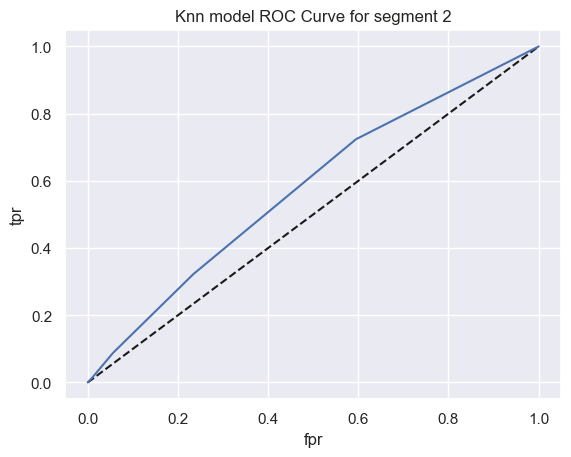

ROC value is 0.5159723967735301




In [27]:
for segment_num in range(0,selected_k):
    data_temp = data.loc[data['Segment']==segment_num]
    Xs = data_temp.drop(columns=['default payment next month'])
    Y = data_temp["default payment next month"]
    X_train, X_validation, y_train, y_validation = train_test_split(Xs, Y, test_size=0.30, random_state=4)

    model = KNeighborsClassifier(n_neighbors=selected_knn_k ).fit(X_train, y_train)

    prediction = model.predict(X_validation)
    y_pred_proba = model.predict_proba(X_validation)[:,1]

    fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='Knn')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Knn model ROC Curve for segment '+str(segment_num))
    plt.show()

    print("ROC value is " + str(roc_auc_score(y_validation, prediction)))
    print("\n")


- Difference in performance between the models built on the AGE segments and the non-segmented population model:

In [28]:
segment_size = []

for i in range(selected_k):
    size = len( data.loc[data['Segment']==i] )
    segment_size.append(size)

model_metrics['Segment Size'] = segment_size

model_metrics['Weighed Avg'] = model_metrics['Segment Size'] * model_metrics['accuracy']

weighted_average = sum(model_metrics['Weighed Avg']) / sum(model_metrics['Segment Size'])


model_metrics

,index,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence,Segment Size,Weighed Avg
0,0,0.78,0.22,0.11,0.04,0.96,0.40,0.21,11326,8834.28
1,0,0.76,0.24,0.09,0.04,0.96,0.37,0.23,13388,10174.88
2,0,0.72,0.28,0.09,0.06,0.94,0.35,0.26,5286,3805.92


In [29]:
print("Weighted average of the three segmented model: {}".format(weighted_average))

Weighted average of the three segmented model: 0.7605026666666668


In [30]:
segment_size = []

for i in range(selected_k):
    size = len( data.loc[data['Segment']==i] )
    segment_size.append(size)

segment_size

[11326, 13388, 5286]

- The segmented models do not appear to perform significantly better than the base KNN model
- Accuracy is slightly better for segment 0, but worse for other segments

# Neural Network Model

- Build a model of default using ANN. Randomly partition the data into a training set (70%) and a validation set (30%). 


In [31]:
Xs = data.drop(columns=['default payment next month'])
Y = data["default payment next month"]
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.30, random_state=4)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(len(Xs.columns),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)


- Score the validation data
- Show confusion matrix and an ROC for the scored validation data

282/282 [==============================] - 0s 326us/step
pred   0.0  1.0
real           
0     6604  365
1     1297  734


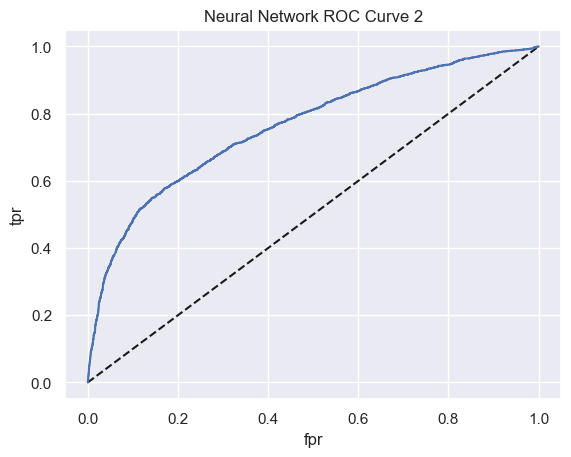

ROC value is 0.654511761625074


In [32]:
y_pred_probs = model.predict(X_test)[:,0]

y_pred = model.predict(X_test)[:,0]
y_pred[y_pred<.5] = 0
y_pred[y_pred>=.5] = 1

accuracy = accuracy_score(y_test, y_pred)

#Confusion Matrix
result = pd.DataFrame({'pred': y_pred, 'real': y_test})
result['fict'] = 1
conf_matrix = pd.pivot_table(result, columns='pred', index='real', values='fict', aggfunc='sum')
print(conf_matrix)


#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Neural Network ROC Curve '+str(segment_num))
plt.show()

print("ROC value is " + str(roc_auc_score(y_test, y_pred)))

- Accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

In [33]:
ann_model_metrics = classification_metrics_df(conf_matrix)
ann_model_metrics

,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence
0,0.82,0.18,0.36,0.05,0.95,0.67,0.23


- Compare Models

In [34]:
# KNN Model
knn_model_metrics

,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence
0,0.77,0.23,0.11,0.04,0.96,0.44,0.23


In [35]:
# segmented models
model_metrics

,index,accuracy,misclassification_rate,true_positive_rate,false_positive_rate,specificity,precision,prevalence,Segment Size,Weighed Avg
0,0,0.78,0.22,0.11,0.04,0.96,0.40,0.21,11326,8834.28
1,0,0.76,0.24,0.09,0.04,0.96,0.37,0.23,13388,10174.88
2,0,0.72,0.28,0.09,0.06,0.94,0.35,0.26,5286,3805.92


In [36]:

# Neural network has the highest accuracy, true positive rate, lowest AUC
    # The data is best suited for this type of model
    # Should consider using K fold validation for the NN to prevent overfi0tting

# Age segments do not appear to have much effect on total accuracy
